In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('./demo-datasets/social_network_ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = data[['Gender', 'Age', 'EstimatedSalary']]

In [5]:
y = data['Purchased']

In [6]:
x.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [7]:
x = pd.get_dummies(x, columns=['Gender'], drop_first=True)

In [8]:
x.head(2)

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1


In [9]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [11]:
forest = RandomForestClassifier(max_depth=2)

In [12]:
forest.fit(x_train, y_train)

c:\users\ernest.daraska\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
y_predict = forest.predict(x_test)

In [14]:
metrics.confusion_matrix(y_test, y_predict)

array([[54, 13],
       [ 4, 29]], dtype=int64)

In [15]:
metrics.accuracy_score(y_test, y_predict)

0.83

### Feature Importance

In [16]:
f_importance = pd.Series(forest.feature_importances_, x.columns)

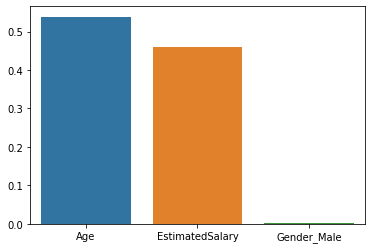

In [17]:
sns.barplot(x.columns, f_importance)

In [19]:
import graphviz as gv
from sklearn.tree import export_graphviz

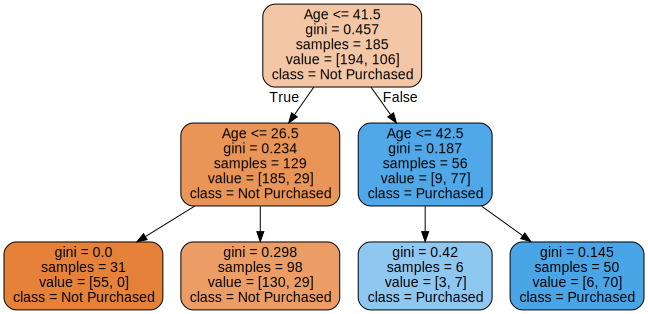

In [21]:
# First tree
gv.Source(export_graphviz(forest.estimators_[0], feature_names=x.columns, filled=True, rounded=True,
                     class_names=['Not Purchased', 'Purchased']))

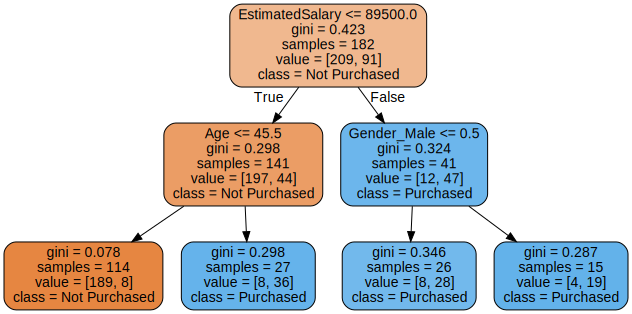

In [35]:
# Second tree
gv.Source(export_graphviz(forest.estimators_[1], feature_names=x.columns, filled=True, rounded=True,
                     class_names=['Not Purchased', 'Purchased']))

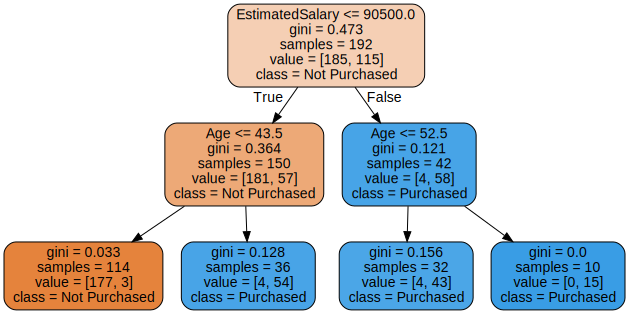

In [36]:
# Third tree
gv.Source(export_graphviz(forest.estimators_[2], feature_names=x.columns, filled=True, rounded=True,
                     class_names=['Not Purchased', 'Purchased']))